## Arbitrary Imputation ==> Feature-Engine

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine.imputation import ArbitraryNumberImputer
import matplotlib.pyplot as plt

**Load the dataset with a selected group of variables!**

In [2]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']
data = pd.read_csv('housingPrices_train.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

**All the predictor variables contain missing data.**

In [4]:
cols_to_use.remove('SalePrice')
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature-Engine captures the numerical variables automatically

**Call the imputer from feature-engine! Specify the arbitrary value as an argument!**

In [5]:
imputer = ArbitraryNumberImputer(arbitrary_number = -999)

**Fit the imputer!**

In [6]:
imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999)

**The imputer finds the numerical variables to impute with the arbitrary value!**

In [7]:
imputer.variables_

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

**See the arbitrary value stored!**

In [8]:
imputer.arbitrary_number

-999

**feature-engine returns a dataframe!**

In [9]:
tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,-999.0,573.0,1998.0
682,Gd,Gd,-999.0,0.0,1996.0
960,TA,NaN,50.0,0.0,-999.0
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


**Check that the numerical variables don't contain NA any more!**

In [10]:
tmp[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

## Feature-engine allows you to specify variable groups easily

**Do imputation over 2 of the 3 numerical variables!**

In [11]:
imputer = ArbitraryNumberImputer(arbitrary_number=-999,
                                 variables=['LotFrontage', 'MasVnrArea'])
imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea'])

**Now the imputer uses only the variables we indicated!**

In [12]:
imputer.variables_

['LotFrontage', 'MasVnrArea']

**See the value assigned to each variable!**

In [13]:
imputer.arbitrary_number

-999

**feature-engine returns a dataframe! Then check null values are gone!**

In [14]:
tmp = imputer.transform(X_train)
tmp[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## We can impute different variables with different numbers

**Look at the distributions to determine the arbitraty values to use!**

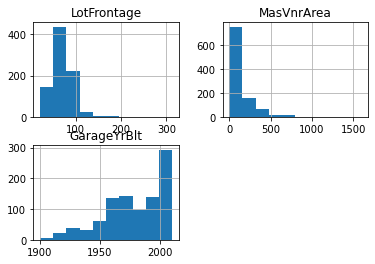

In [15]:
X_train.hist()
plt.show()

In [18]:
imputer = ArbitraryNumberImputer(
    imputer_dict={'LotFrontage': -999, 'MasVnrArea': -999, 'GarageYrBlt': -1})
imputer.fit(X_train)

ArbitraryNumberImputer(imputer_dict={'GarageYrBlt': -1, 'LotFrontage': -999,
                                     'MasVnrArea': -999})

**Now the imputer uses only the variables we indicated!**

In [19]:
imputer.variables_

dict_keys(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [20]:
imputer.imputer_dict_

{'LotFrontage': -999, 'MasVnrArea': -999, 'GarageYrBlt': -1}

**feature-engine returns a dataframe! Check null values are gone!**

In [21]:
tmp = imputer.transform(X_train)
tmp[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

**Check the histograms of the variables after the imputation!**

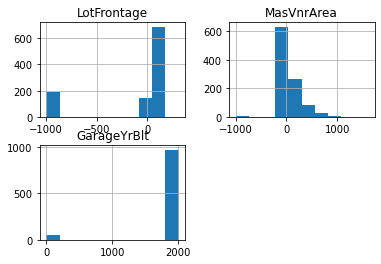

In [22]:
tmp[imputer.variables_].hist()
plt.show()